In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from textblob import Word
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("vader_lexicon")

import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /Users/oabas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/oabas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/oabas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


## Data Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [4]:
df.shape

(4915, 12)

In [5]:
# Checking for missing values
df.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [6]:
# Dropping missing values
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [7]:
df.shape

(4913, 12)

In [8]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,4913.0,4.587625,0.996995,1.0,5.0,5.0,5.0,5.000000
day_diff,4913.0,437.346224,209.360537,1.0,281.0,431.0,601.0,1064.000000
helpful_yes,4913.0,1.311215,41.627627,0.0,0.0,0.0,0.0,1952.000000
helpful_no,4913.0,0.210258,4.024098,0.0,0.0,0.0,0.0,183.000000
total_vote,4913.0,1.521474,44.132066,0.0,0.0,0.0,0.0,2020.000000
score_pos_neg_diff,4913.0,1.100957,39.375960,-130.0,0.0,0.0,0.0,1884.000000
score_average_rating,4913.0,0.075363,0.255973,0.0,0.0,0.0,0.0,1.000000
wilson_lower_bound,4913.0,0.020019,0.077156,0.0,0.0,0.0,0.0,0.957544


## Exploratory Data Analysis

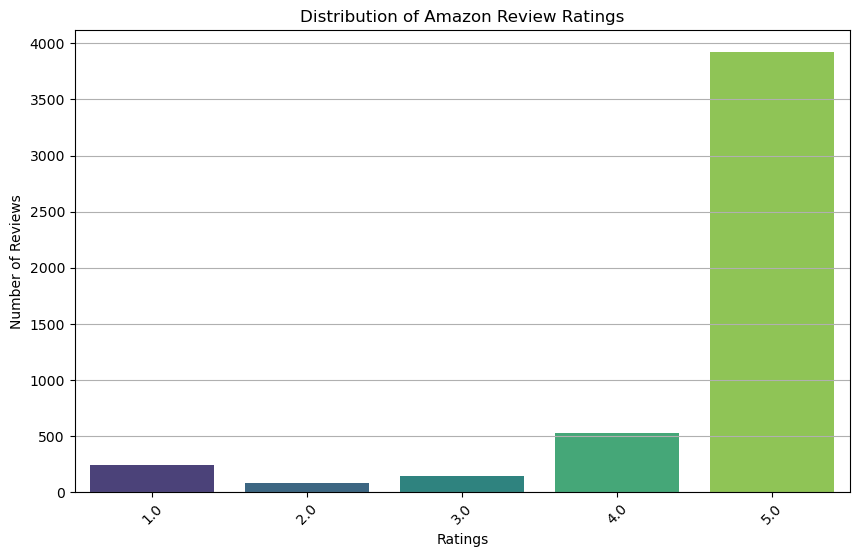

(None,
 1.0     244
 2.0      80
 3.0     142
 4.0     526
 5.0    3921
 Name: overall, dtype: int64)

In [10]:
# Summary of the distribution of ratings
rating_counts = df['overall'].value_counts().sort_index()

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title("Distribution of Amazon Review Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show(), rating_counts

From the bar chart and the counts, we can observe that:

* The majority of the reviews are highly positive, with 5-star ratings being the most common.
* There's a clear skew towards higher ratings, indicating overall positive feedback.
* Lower ratings (1 and 2 stars) are relatively rare in comparison to higher ratings.

This distribution suggests that customers are generally satisfied with the products, or it could indicate a tendency for customers to leave reviews primarily when they have a positive experience.

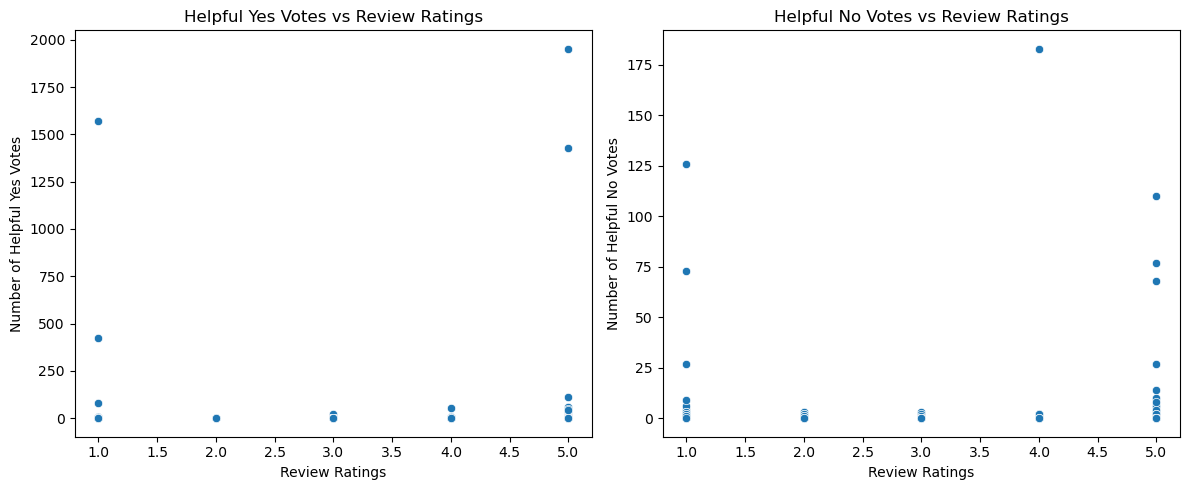

In [11]:
# Correlation analysis
correlation_data = df[['overall', 'helpful_yes', 'helpful_no']].corr()

# Scatter plot for 'helpful_yes' vs 'overall'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='overall', y='helpful_yes', data= df)
plt.title('Helpful Yes Votes vs Review Ratings')
plt.xlabel('Review Ratings')
plt.ylabel('Number of Helpful Yes Votes')

# Scatter plot for 'helpful_no' vs 'overall'
plt.subplot(1, 2, 2)
sns.scatterplot(x='overall', y='helpful_no', data=df)
plt.title('Helpful No Votes vs Review Ratings')
plt.xlabel('Review Ratings')
plt.ylabel('Number of Helpful No Votes')

plt.tight_layout()
plt.show()

To examine the relationship between helpful votes and review ratings, we can analyze how the number of helpful votes (both "yes" and "no") varies with the review ratings. This can give us insights into whether certain ratings are perceived as more helpful by other users.

We'll look at this relationship in two ways:

1. Correlation Analysis: To understand if there's a linear relationship between the number of helpful votes and the ratings.
2. Visual Analysis: Creating scatter plots or other visualizations to observe patterns or trends between these variables.

For the purpose of this analysis, we'll consider the `helpful_yes` and `helpful_no` columns in relation to the `overall` rating column. Let's start with the correlation analysis and then move on to the visual representation.

**Scatter Plots Analysis**
* The scatter plot for "Helpful Yes Votes vs Review Ratings" doesn't show a clear trend or pattern, indicating that the number of helpful 'yes' votes doesn't significantly vary with the review ratings.
* Similarly, the scatter plot for "Helpful No Votes vs Review Ratings" also does not show any significant trends.

In [12]:
correlation_data

,overall,helpful_yes,helpful_no
overall,1.00000,-0.031220,-0.066170
helpful_yes,-0.03122,1.000000,0.592747
helpful_no,-0.06617,0.592747,1.000000


**Correlation Analysis**
* The correlation between `overall` ratings and `helpful_yes` is −0.031, indicating a very weak negative relationship.
* The correlation between `overall` ratings and `helpful_no` is −0.066, also indicating a very weak negative relationship.
* There is a moderate positive correlation (0.593) between `helpful_yes` and `helpful_no`, suggesting that reviews which get many 'yes' votes also tend to get a fair number of 'no' votes.

**Interpretation**
* The very weak negative correlations suggest that higher-rated reviews do not necessarily receive more helpful votes, whether 'yes' or 'no'.
* The absence of a strong pattern in the scatter plots supports this conclusion.
* The moderate positive correlation between 'helpful_yes' and 'helpful_no' could indicate that reviews with more engagement (votes) tend to attract both types of votes.

These findings suggest that the perceived helpfulness of a review, as indicated by 'yes' and 'no' votes, is not strongly influenced by the rating given in the review. This could imply that users consider factors other than the rating itself when judging the helpfulness of a review.

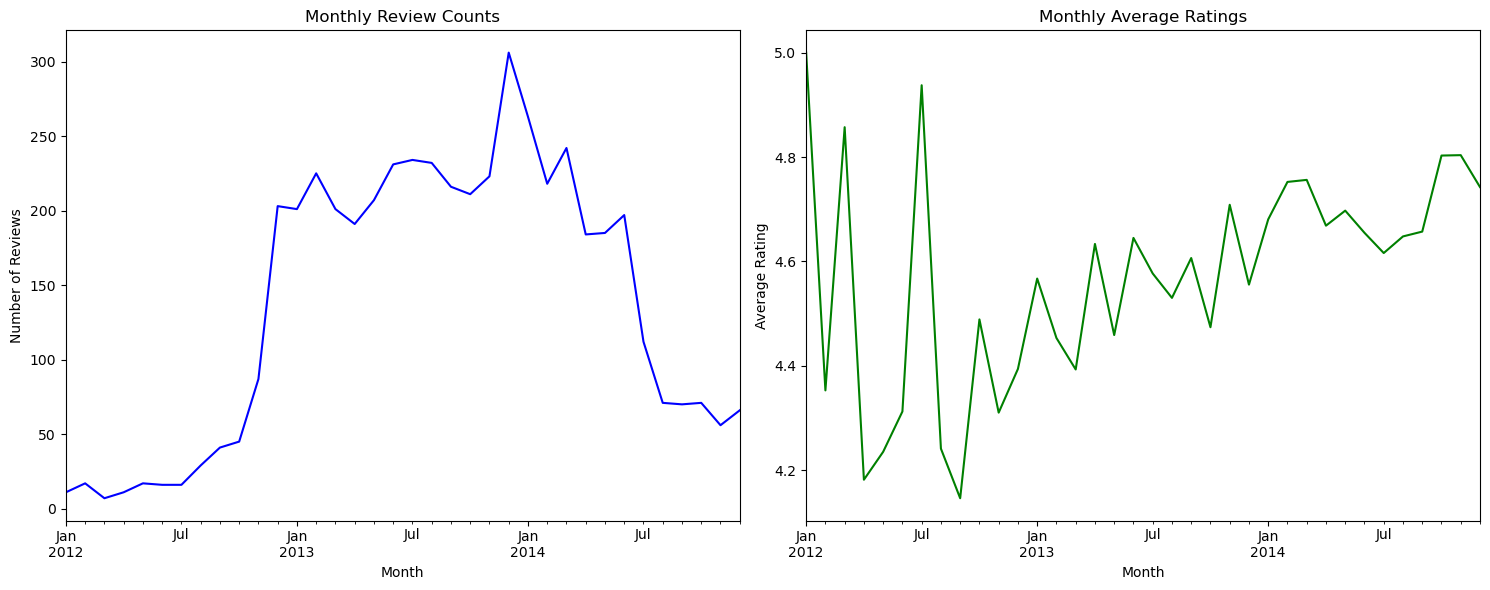

In [13]:
# Convert 'reviewTime' to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Setting the index to 'reviewTime' for easier time-based analysis
amazon_reviews_time_indexed = df.set_index('reviewTime')

# Resampling the data on a monthly basis
# Count of reviews per month
monthly_review_count = amazon_reviews_time_indexed['overall'].resample('M').count()

# Average rating per month
monthly_average_rating = amazon_reviews_time_indexed['overall'].resample('M').mean()

# Plotting the trend of review counts and average ratings over time
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
monthly_review_count.plot(title='Monthly Review Counts', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

plt.subplot(1, 2, 2)
monthly_average_rating.plot(title='Monthly Average Ratings', color='green')
plt.xlabel('Month')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

1. Monthly Review Counts: This graph shows the number of reviews posted each month. We observe some fluctuations over time. To gain more insights, identifying specific peaks or declines could be correlated with external events like product launches or holiday seasons.

2. Monthly Average Ratings: This graph represents the average rating given each month. The trend here appears relatively stable, with some variation. It's interesting to note that despite the fluctuation in the number of reviews, the average rating seems to remain consistent over time.

These trends can provide valuable insights, especially when linked with external factors like marketing campaigns, product changes, or seasonal effects. For a more detailed analysis, identifying key dates and correlating them with these trends could be beneficial.

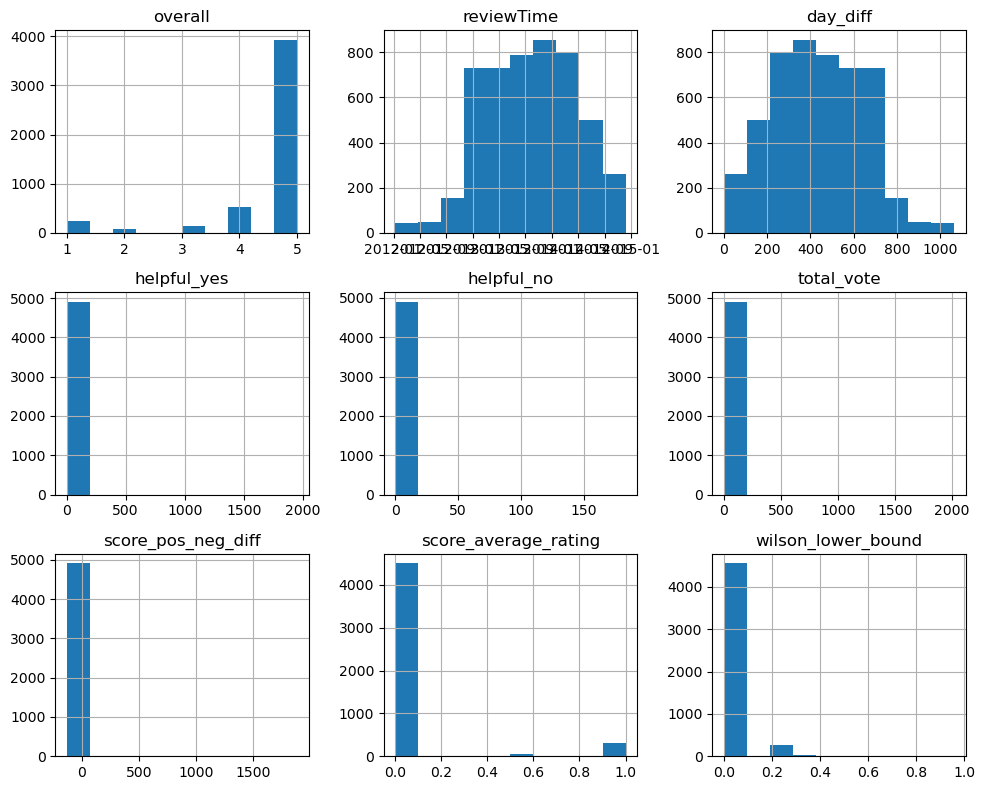

In [14]:
# Plot histograms of numeric variables
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

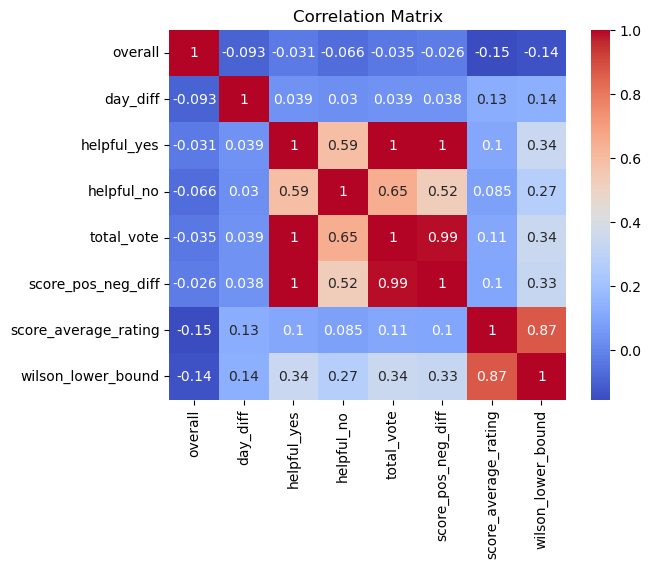

In [15]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.head(2)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


In [17]:
df1 = df.copy()
df1.head(2)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


In [18]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

df1['overall'] = df1["overall"].apply(sentiment)
df1.head(2)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,Positive,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,Positive,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


In [19]:
df.head(3)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0


In [20]:
df1 = df1[['reviewText', 'overall']].dropna()
df1.head()

,reviewText,overall
1,"Purchased this for my device, it worked as adv...",Positive
2,it works as expected. I should have sprung for...,Positive
3,This think has worked out great.Had a diff. br...,Positive
4,"Bought it with Retail Packaging, arrived legit...",Positive
5,It's mini storage. It doesn't do anything els...,Positive


<Axes: >

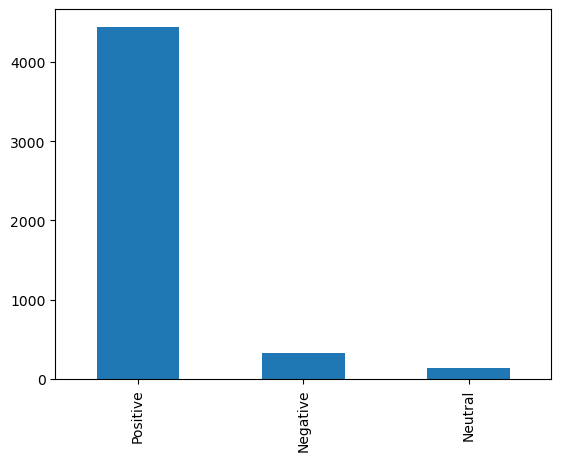

In [21]:
df1.overall.value_counts().plot(kind = "bar")

## Text Processing

In [22]:
def text_preprocessing(dataframe, dependent_var):
  # Normalizing Case Folding - Uppercase to Lowercase
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

  # Removing Punctuation
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('[^\w\s]','')

  # Removing Numbers
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('\d','')

  # StopWords
  sw = stopwords.words('english')
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

  # Remove Rare Words
  temp_df = pd.Series(' '.join(dataframe[dependent_var]).split()).value_counts()
  drops = temp_df[temp_df <= 1]
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

  # Lemmatize
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

  return dataframe

In [23]:
df1 = text_preprocessing(df1, "reviewText")
df1["reviewText"].head()

1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
5    mini storage doesnt anything else supposed pur...
Name: reviewText, dtype: object

## Text Visualization

In [24]:
def text_visulaization(dataframe, dependent_var, barplot=True, wordcloud=True):
  # Calculation of Term Frequencies
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
  tf.columns = ["words", "tf"]

  if barplot:
    # Bar Plot
    tf[tf["tf"]>1000].plot.barh(x="words", y="tf")
    plt.title("Calculation of Term Frequencies : barplot")
    plt.show()

  if wordcloud:
    # WordCloud
    text = " ".join(i for i in dataframe[dependent_var])
    wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)
    plt.figure(figsize=[10, 10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Calculation of Term Frequencies : wordcloud")
    plt.show()
    wordcloud.to_file("wordcloud.png")

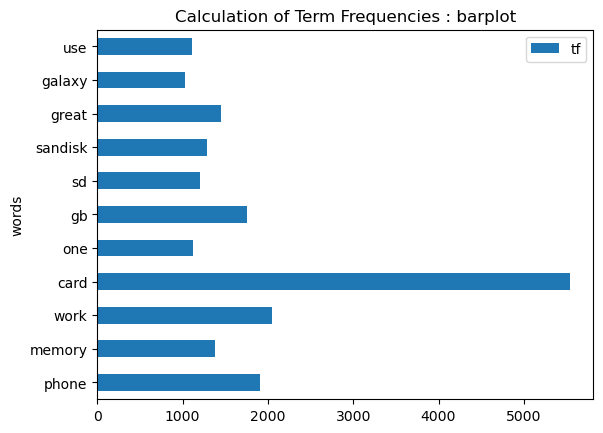

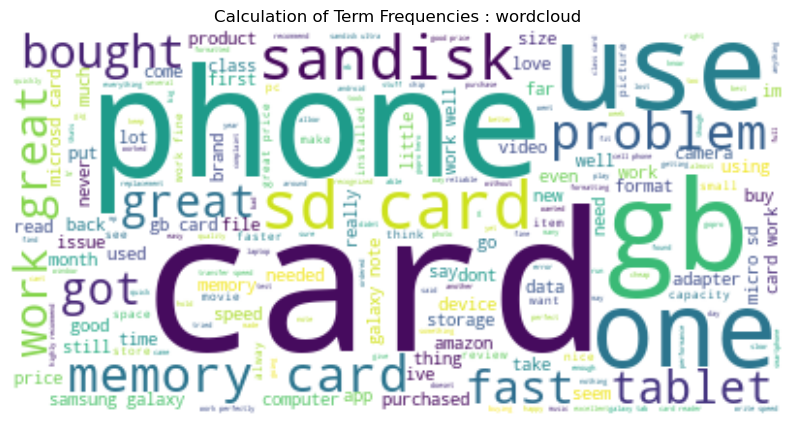

In [25]:
text_visulaization(df1, "reviewText")

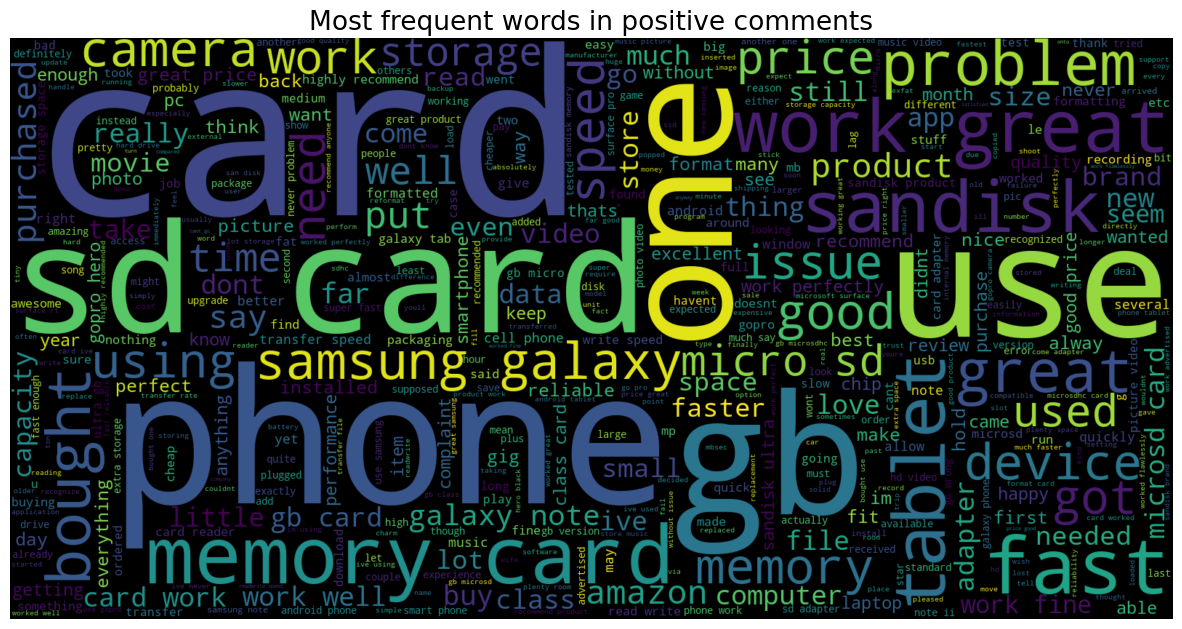

In [26]:
pos_comments = df1[df1.overall == 'Positive']

text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

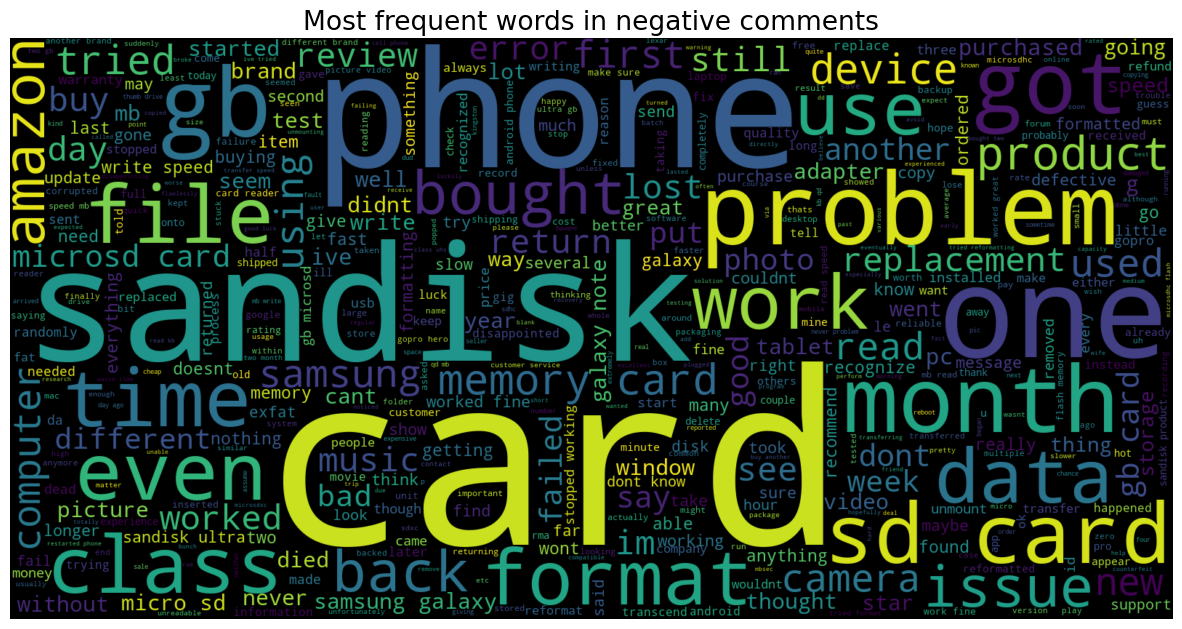

In [27]:
neg_comments = df1[df1.overall == 'Negative']

text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

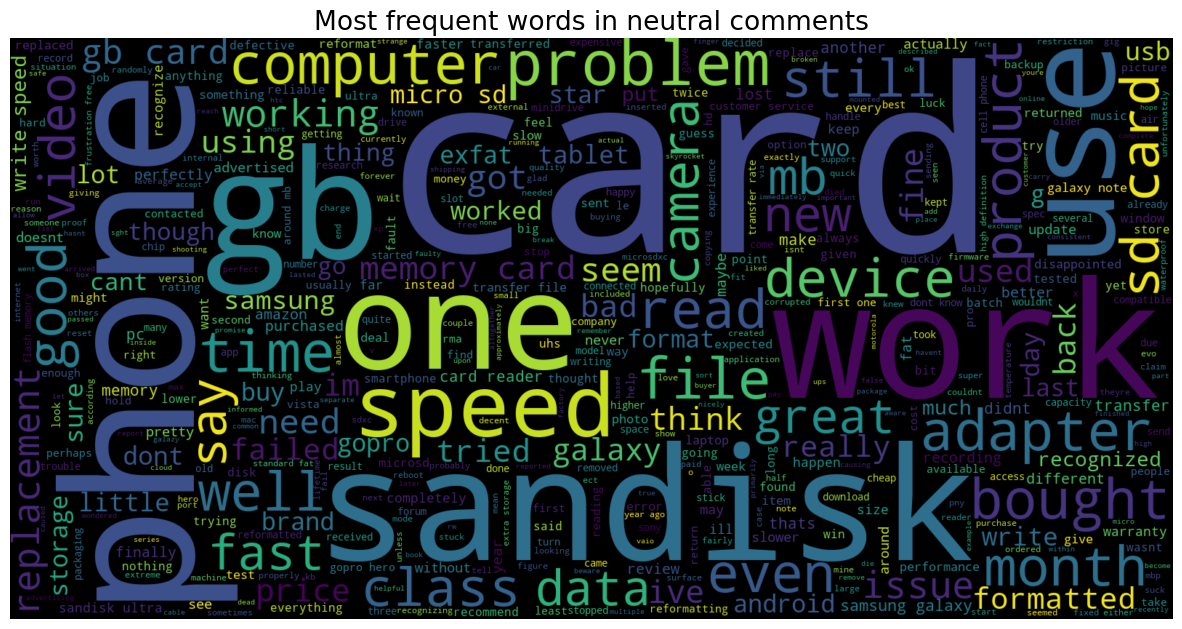

In [28]:
neu_comments = df1[df1.overall == 'Neutral']

text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

## Model Development

In [29]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df1['reviewText'])

X = df1['reviewText']
y = df1['overall']
X = vect.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Size of x_train:',(X_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(X_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (3930, 65985)
Size of y_train: (3930,)
Size of x_test: (983, 65985)
Size of y_test: (983,)


### Logistic Regression

In [30]:
# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the classifier on the training set
logreg.fit(X_train,y_train)

# Predict the sentiment of the test set
logreg_pred = logreg.predict(X_test)

# Evaluate the classifier's performance on the test set
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

Test accuracy : 92.68%


In [31]:
# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, logreg_pred))

[[ 31   2  35]
 [  1   0  24]
 [  8   2 880]]


In [32]:
# Print the classification report
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

    Negative       0.78      0.46      0.57        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.94      0.99      0.96       890

    accuracy                           0.93       983
   macro avg       0.57      0.48      0.51       983
weighted avg       0.90      0.93      0.91       983



### Hypertuning the Logistic Regression

In [33]:
param_grid = {'C':[0.001,0.01,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]})

In [34]:
print("Best parameters : ", grid.best_params_)

Best parameters :  {'C': 10}


In [35]:
y_pred = grid.predict(X_test)

logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 92.98%


In [36]:
print(confusion_matrix(y_test, y_pred))

[[ 35   2  31]
 [  2   0  23]
 [  9   2 879]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.76      0.51      0.61        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.94      0.99      0.96       890

    accuracy                           0.93       983
   macro avg       0.57      0.50      0.53       983
weighted avg       0.91      0.93      0.92       983



### Decision Tree Classifier

In [38]:
# Create a Decision Tree Classifier object
dt_class = DecisionTreeClassifier()

# Train the classifier on the training set
dt_class.fit(X_train,y_train)

# Predict the sentiment of the test set
dt_pred = dt_class.predict(X_test)

# Evaluate the classifier's performance on the test set
dt_acc = accuracy_score(dt_pred,y_test)
print('Test accuracy : {:.2f}%'.format(dt_acc*100))

Test accuracy : 89.11%


In [39]:
# Print the confusion matrix of the dt_class model
print(confusion_matrix(y_test, dt_pred))

[[ 24   3  41]
 [  2   1  22]
 [ 27  12 851]]


In [40]:
# Print the classification report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

    Negative       0.45      0.35      0.40        68
     Neutral       0.06      0.04      0.05        25
    Positive       0.93      0.96      0.94       890

    accuracy                           0.89       983
   macro avg       0.48      0.45      0.46       983
weighted avg       0.88      0.89      0.88       983



### Random Forest Classifier

In [41]:
# Create a Random Forest Classifier object
rf_class = RandomForestClassifier()

# Train the classifier on the training set
rf_class.fit(X_train,y_train)

# Predict the sentiment of the test set
rf_pred = rf_class.predict(X_test)

# Evaluate the classifier's performance on the test set
rf_acc = accuracy_score(rf_pred,y_test)
print('Test accuracy : {:.2f}%'.format(rf_acc*100))

Test accuracy : 90.54%


In [42]:
# Print the confusion matrix of the rf_class model
print(confusion_matrix(y_test, rf_pred))

[[  0   0  68]
 [  0   0  25]
 [  0   0 890]]


In [43]:
# Print the classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.91      1.00      0.95       890

    accuracy                           0.91       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.82      0.91      0.86       983



### AdaBoost Classifier

In [44]:
# Create a AdaBoost Classifier object
ada_class = AdaBoostClassifier()

# Train the classifier on the training set
ada_class.fit(X_train,y_train)

# Predict the sentiment of the test set
ada_pred = ada_class.predict(X_test)

# Evaluate the classifier's performance on the test set
ada_acc = accuracy_score(ada_pred,y_test)
print('Test accuracy : {:.2f}%'.format(ada_acc*100))

Test accuracy : 91.35%


In [45]:
# Print the confusion matrix of the ada_class model
print(confusion_matrix(y_test, ada_pred))

[[ 24   3  41]
 [  0   0  25]
 [ 11   5 874]]


In [46]:
# Print the classification report
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

    Negative       0.69      0.35      0.47        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.93      0.98      0.96       890

    accuracy                           0.91       983
   macro avg       0.54      0.44      0.47       983
weighted avg       0.89      0.91      0.90       983



### Gradient Boosting Classifier

In [47]:
# Create a Gradient Boosting Classifier object
gb_class = GradientBoostingClassifier()

# Train the classifier on the training set
gb_class.fit(X_train,y_train)

# Predict the sentiment of the test set
gb_pred = gb_class.predict(X_test)

# Evaluate the classifier's performance on the test set
gb_acc = accuracy_score(gb_pred,y_test)
print('Test accuracy : {:.2f}%'.format(gb_acc*100))

Test accuracy : 91.56%


In [48]:
# Print the confusion matrix of the gb_class model
print(confusion_matrix(y_test, gb_pred))

[[ 18   1  49]
 [  2   0  23]
 [  8   0 882]]


In [49]:
# Print the classification report
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

    Negative       0.64      0.26      0.37        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.92      0.99      0.96       890

    accuracy                           0.92       983
   macro avg       0.52      0.42      0.44       983
weighted avg       0.88      0.92      0.89       983



### Linear Support Vector Classifier

In [50]:
# Create a LinearSVC object
SVC_model = LinearSVC()

# Train the classifier on the training set
SVC_model.fit(X_train,y_train)

# Predict the sentiment of the test set
SVC_pred = SVC_model.predict(X_test)

# Evaluate the classifier's performance on the test set
SVC_acc = accuracy_score(SVC_pred,y_test)
print('Test accuracy : {:.2f}%'.format(SVC_acc*100))

Test accuracy : 92.68%


In [51]:
# Print the confusion matrix of the SVC_model
print(confusion_matrix(y_test, SVC_pred))

[[ 36   2  30]
 [  2   0  23]
 [ 13   2 875]]


In [52]:
# Print the classification report
print(classification_report(y_test, SVC_pred))

              precision    recall  f1-score   support

    Negative       0.71      0.53      0.61        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.94      0.98      0.96       890

    accuracy                           0.93       983
   macro avg       0.55      0.50      0.52       983
weighted avg       0.90      0.93      0.91       983



### Naive Bayes Classifier

In [53]:
# Create a Naive Bayes classifier object
classifier = MultinomialNB()

# Train the classifier on the training set
classifier.fit(X_train, y_train)

# Predict the sentiment of the test set
predictions = classifier.predict(X_test)

# Evaluate the classifier's performance on the test set
accuracy = accuracy_score(predictions, y_test)
print('Test accuracy : {:.2f}%'.format(accuracy*100))

Test accuracy : 92.37%


In [54]:
# Print the confusion matrix of the classifier
print(confusion_matrix(y_test, predictions))

[[ 30   0  38]
 [  1   0  24]
 [ 10   2 878]]


In [55]:
# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.73      0.44      0.55        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.93      0.99      0.96       890

    accuracy                           0.92       983
   macro avg       0.56      0.48      0.50       983
weighted avg       0.90      0.92      0.91       983



## Sentiment Analysis